# Ds Job Post Dea

This is a dataset of data science job posts in glassdoor.

Content
The data was scrapped from glassdoor's website. There are two versions of the data one is uncleaned and another one is cleaned. Web scrapping, Data cleaning & EDA code are added in the code section.

In the cleaned version the columns explanation are as follows,

Job Title: Title of the job posting
Salary Estimation: Salary range for that particular job
Job Description: This contains the full description of that job
Rating: Rating of that post
Company: Name of company
Location: Location of the company
Headquarter: Location of the headquater
Size: Total employee in that company
Type of ownership: Describes the company type i.e non-profit/public/private farm etc
Industry, Sector: Field applicant will work in
Revenue: Total revenue of the company
min_salary,max_salary,avg_salary: Refers to the minimum, maximum and average salary for that post
job_state: State where the applicant will work
same_state: Same state as headquarter or not(Boolean)
company_age: Age of company
python,excel,hadoop,spark,aws,tableau,big_data: Some most appeared skills in boolean columns form
job_simp: Job type
seniority: if job type is senior or not (Boolean)

In [5]:
#basic Packeges
import os 
import re

# analysis Packeges
import numpy as np # linear algebra
import pandas as pd

# plot Packeges
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### Read dataset

In [7]:
uncleaned_data = pd.read_csv('Uncleaned_DS_jobs.csv')
uncleaned_data.head(3)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1


In [14]:
cleaned_data = pd.read_csv('Cleaned_DS_Jobs.csv')
# na is mid-level
cleaned_data.seniority = cleaned_data.seniority.str.replace('na', 'Mid-level')
cleaned_data.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52,0,0,1,0,0,0,1,data scientist,Mid-level


## Description of columns
* Job Title: Title of the job posting
* Salary Estimation: Salary range for that particular job
* Job Description: This contains the full description of that job
* Rating: Rating of that post
* Company: Name of company
* Location: Location of the company
* Headquarter: Location of the headquater
* Size: Total employee in that company
* Type of ownership: Describes the company type i.e non-profit/public/private farm etc
* Industry, Sector: Field applicant will work in
* Revenue: Total revenue of the company
* min_salary,max_salary,avg_salary: Refers to the minimum, maximum and average salary for that post
* job_state: State where the applicant will work
* same_state: Same state as headquarter or not(Boolean)
* company_age: Age of company
* python,excel,hadoop,spark,aws,tableau,big_data: Some most appeared skills in boolean columns form
* job_simp: Job type
* seniority: if job type is senior or not (Boolean)




## Questions 
1. what is the average, max , min of salaries ?
2. what is the uniques values in each column ?
3. distrubtion in salaries 
4. distrubtion in Rates 
5. Pie chart for company size 
6. bar chart for ownership 
7. Pie chart for Revenue
8. Pie chart for job state
9. distrubtion in company age
10. Boolean columns graphes 



In [15]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          660 non-null    object 
 1   Salary Estimate    660 non-null    object 
 2   Job Description    660 non-null    object 
 3   Rating             660 non-null    float64
 4   Company Name       660 non-null    object 
 5   Location           660 non-null    object 
 6   Headquarters       660 non-null    object 
 7   Size               660 non-null    object 
 8   Type of ownership  660 non-null    object 
 9   Industry           660 non-null    object 
 10  Sector             660 non-null    object 
 11  Revenue            660 non-null    object 
 12  min_salary         660 non-null    int64  
 13  max_salary         660 non-null    int64  
 14  avg_salary         660 non-null    int64  
 15  job_state          660 non-null    object 
 16  same_state         660 non

total nan in dataset

In [18]:
cleaned_data.isna().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
min_salary           0
max_salary           0
avg_salary           0
job_state            0
same_state           0
company_age          0
python               0
excel                0
hadoop               0
spark                0
aws                  0
tableau              0
big_data             0
job_simp             0
seniority            0
dtype: int64

### 1. what is the average, max , min of salaries ?

In [24]:
cleaned_data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'job_state', 'same_state', 'company_age', 'python',
       'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data', 'job_simp',
       'seniority'],
      dtype='object')

In [19]:
# what is the average, max , min of salaries 
cleaned_data.describe()

,Rating,min_salary,max_salary,avg_salary,same_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,3.587424,99.296970,148.301515,123.612121,0.407576,29.736364,0.730303,0.440909,0.212121,0.281818,0.260606,0.184848,0.206061
std,1.183540,33.161485,48.264588,39.786698,0.491756,39.763033,0.444139,0.496873,0.409120,0.450226,0.439298,0.388469,0.404781
min,0.000000,31.000000,56.000000,43.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,79.000000,119.000000,103.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,91.000000,133.000000,114.000000,0.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.300000,122.000000,165.000000,136.000000,1.000000,37.250000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,5.000000,212.000000,331.000000,271.000000,1.000000,239.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2. what is the uniques values in each column ?


In [26]:
cleaned_data.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52,0,0,1,0,0,0,1,data scientist,Mid-level


In [154]:
print(f"summation of Job is {cleaned_data["Job Title"].unique().shape[0]}")

df = (cleaned_data.groupby(by=["Job Title"], as_index=False)
      .agg(count_job =('Job Title', 'count'))
      .sort_values(by="count_job", ascending=False)).reset_index().drop(columns= 'index')
df.head(20)


summation of Job is 168


,Job Title,count_job
0,Data Scientist,333
1,Data Engineer,26
2,Senior Data Scientist,19
3,Machine Learning Engineer,14
4,Data Analyst,12
5,Senior Data Analyst,6
6,Senior Data Engineer,5
7,Data Science Software Engineer,4
8,Data Scientist - TS/SCI FSP or CI Required,4
9,ENGINEER - COMPUTER SCIENTIST - RESEARCH COMPU...,4


In [139]:
cleaned_data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'job_state', 'same_state', 'company_age', 'python',
       'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data', 'job_simp',
       'seniority'],
      dtype='object')

In [150]:

cleaned_data['Job Title'].value_counts()

Job Title
Data Scientist                                            333
Data Engineer                                              26
Senior Data Scientist                                      19
Machine Learning Engineer                                  14
Data Analyst                                               12
                                                         ... 
Business Data Analyst                                       1
Purification Scientist                                      1
Data Science Instructor                                     1
Data Engineer, Enterprise Analytics                         1
AI/ML - Machine Learning Scientist, Siri Understanding      1
Name: count, Length: 168, dtype: int64

In [160]:
for col in cleaned_data.columns:
    value=cleaned_data[col].value_counts()
    print('-'*50)
    print(f'Column {col} has {len(value)} unique values\n')
    if col =='Job Description':
        pass
    elif len(value)<20:
        print(f'the unique values are {value}')
    else:
        print(f'the most frequent value are {value.iloc[:15]}\n\n')
    


--------------------------------------------------
Column Job Title has 168 unique values

the most frequent value are Job Title
Data Scientist                                                                                      333
Data Engineer                                                                                        26
Senior Data Scientist                                                                                19
Machine Learning Engineer                                                                            14
Data Analyst                                                                                         12
Senior Data Analyst                                                                                   6
Senior Data Engineer                                                                                  5
ENGINEER - COMPUTER SCIENTIST - RESEARCH COMPUTER SCIENTIST - SIGNAL PROCESSING - SAN ANTONIO OR      4
Data Science Software Engineer         

In [25]:
# 2. what is the uniques values in each column ?
for col in cleaned_data.columns:
    value=cleaned_data[col].value_counts()
    print('-'*50)
    print(f'Column {col} has {len(value)} unique values\n')
    if col =='Job Description':
        pass
    elif len(value)<20:
        print(f'the unique values are {value}')
    else:
        print(f'the most frequent value are {value.iloc[:15]}\n\n')
    


--------------------------------------------------
Column Job Title has 168 unique values

the most frequent value are Job Title
Data Scientist                                                                                      333
Data Engineer                                                                                        26
Senior Data Scientist                                                                                19
Machine Learning Engineer                                                                            14
Data Analyst                                                                                         12
Senior Data Analyst                                                                                   6
Senior Data Engineer                                                                                  5
ENGINEER - COMPUTER SCIENTIST - RESEARCH COMPUTER SCIENTIST - SIGNAL PROCESSING - SAN ANTONIO OR      4
Data Science Software Engineer         

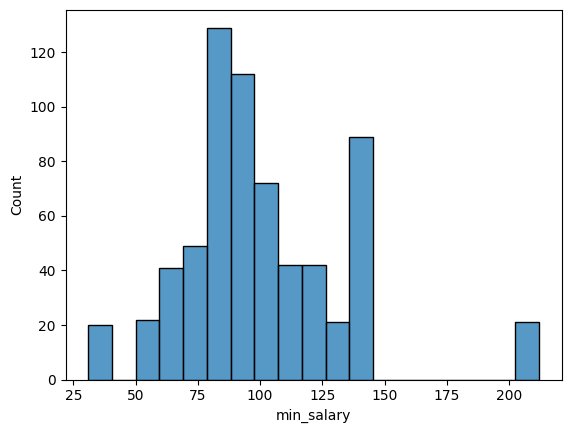

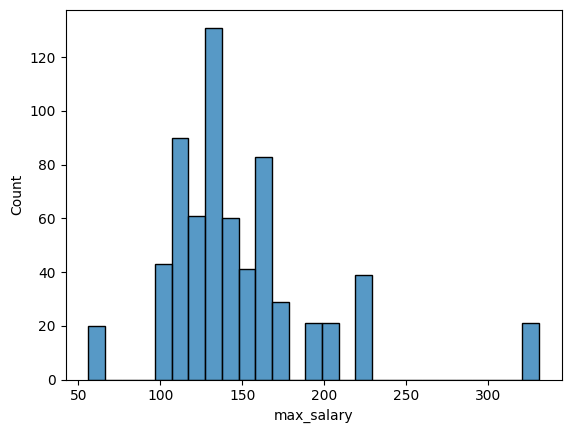

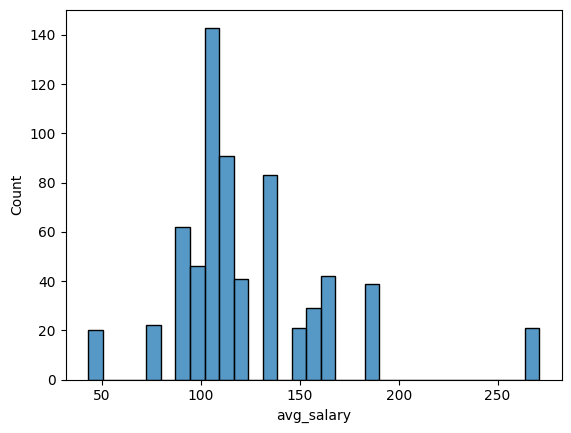

In [7]:
#3. distrubtion in salaries 
for col_name in ['min_salary', 'max_salary', 'avg_salary']:
    sns.histplot(data=cleaned_data, x=col_name)
    plt.show()
#     fig= px.histogram(data_frame=cleaned_data, x= col_name)
#     fig.show()

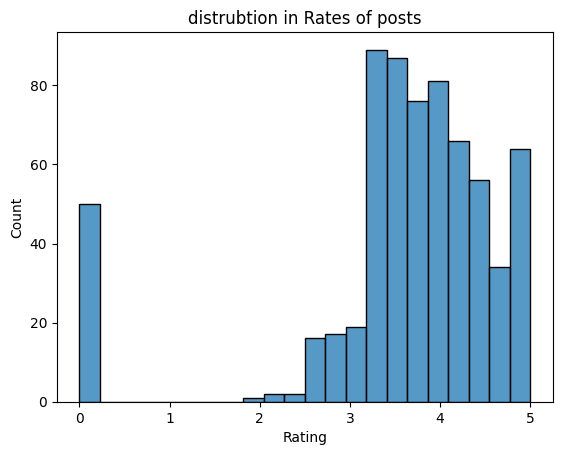

In [8]:
# 4.distrubtion in Rates 
sns.histplot(data=cleaned_data, x='Rating')
plt.title('distrubtion in Rates of posts')
plt.show()

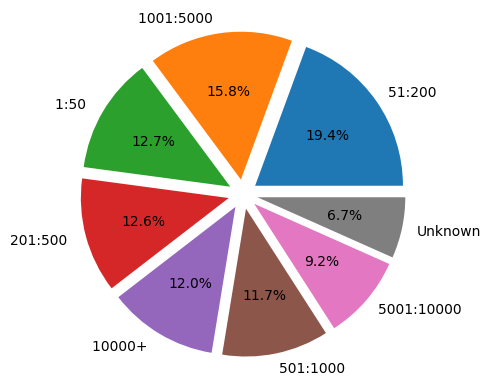

Size
51:200         128
1001:5000      104
1:50            84
201:500         83
10000+          79
501:1000        77
5001:10000      61
Unknown         44
Name: count, dtype: int64

In [9]:
# 5.Pie chart for company size 
cleaned_data.Size=cleaned_data.Size.str.replace('-1','Unknown').str.replace('employees','').str.replace(' to ',':')
size_clean_data = cleaned_data.Size.value_counts()
plt.pie(x= size_clean_data.values, labels=size_clean_data.index, explode=[0.1]*8,autopct = '%1.1f%%' )
plt.show()
size_clean_data

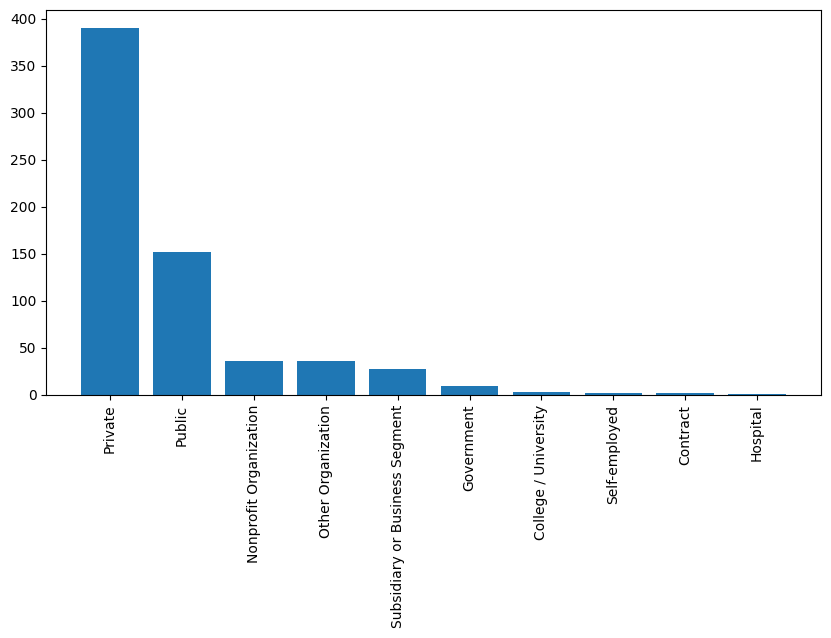

Type of ownership
Private                           390
Public                            152
Nonprofit Organization             36
Other Organization                 36
Subsidiary or Business Segment     28
Government                         10
College / University                3
Self-employed                       2
Contract                            2
Hospital                            1
Name: count, dtype: int64

In [10]:
# 6.bar chart for ownership 
cleaned_data['Type of ownership']=cleaned_data['Type of ownership'].str.replace('-1','Unknown')
cleaned_data['Type of ownership']=cleaned_data['Type of ownership'].str.replace('Company - ','')
cleaned_data['Type of ownership']=cleaned_data['Type of ownership'].str.replace('Private Practice / Firm'
                                                                                ,'Private')
cleaned_data['Type of ownership']=cleaned_data['Type of ownership'].str.replace('Unknown','Other Organization')

ownership_clean_data = cleaned_data['Type of ownership'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(x=ownership_clean_data.index, height=ownership_clean_data.values )
plt.xticks(rotation=90)
plt.show()
ownership_clean_data

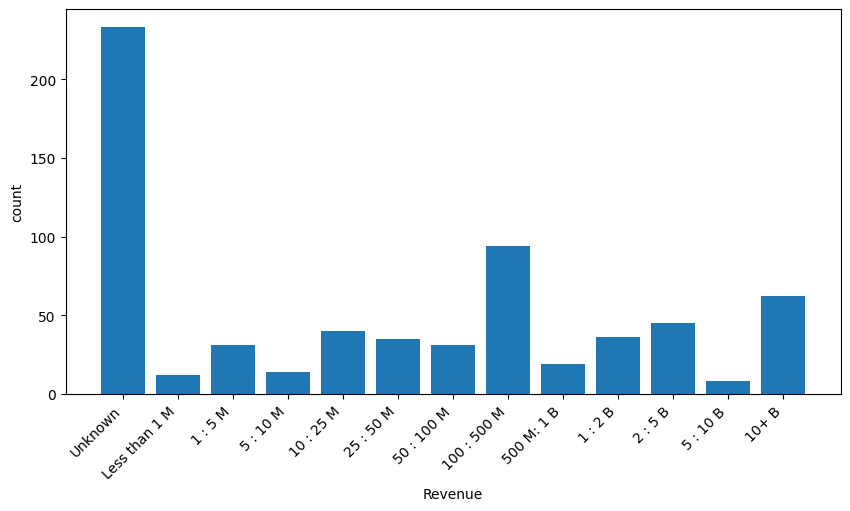

Revenue
Unknown          233
100 : 500 M       94
10+ B             62
2 : 5 B           45
10 : 25 M         40
1 : 2 B           36
25 : 50 M         35
50 : 100 M        31
1 : 5 M           31
500 M: 1 B        19
5 : 10 M          14
Less than 1 M     12
5 : 10 B           8
Name: count, dtype: int64

In [11]:
# 7.Bar chart for Revenue
idx = [1,8,13,11,5,10,6,7,3,9,4,2,12]
cleaned_data.Revenue = cleaned_data.Revenue.str.replace('Unknown / Non-Applicable', 'Unknown').str.replace('-1', 'Unknown').str.replace('$', '')
cleaned_data.Revenue = cleaned_data.Revenue.str.replace('million ', 'M').str.replace('billion ', 'B').str.replace('(USD)', '').str.replace('to', ':')
revenue_clean_data = cleaned_data.Revenue.value_counts()
revenue_clean_data=revenue_clean_data.reset_index()
revenue_clean_data['index']= idx
revenue_clean_data.set_index('index', drop=True, inplace=True)
revenue_clean_data.sort_index(inplace=True)
# print((revenue_clean_data))

plt.figure(figsize=(10,5))
sns.barplot(data = revenue_clean_data, x= 'Revenue', y = 'count', palette='Blues_d')
plt.bar(x=revenue_clean_data['Revenue'], height=revenue_clean_data['count'])
plt.xticks(rotation=45, ha='right')
plt.show()
cleaned_data.Revenue.value_counts()

In [12]:
# I will create a new column called average revenue to compare the salarey with it 
def avg_rev(rev):
    if rev== 'Unknown':
        return np.nan
    revs = re.findall(r'\d+',rev)
    if 'M' in rev and 'B' in rev:
        bounds= [float(revs[0])*1e6 ,float(revs[1])*1e9  ]
    elif 'M' in rev:
        bounds= [float(num)*1e6 for num in revs  ]
    elif 'B' in rev:
        bounds= [float(num)*1e9 for num in revs  ]  
    
    avg = np.mean(bounds)
    return avg
    
cleaned_data['Average Revenue'] = cleaned_data.Revenue.apply(avg_rev)
cleaned_data['Average Revenue'] 

0               NaN
1      1.500000e+09
2      3.000000e+08
3      3.000000e+08
4               NaN
           ...     
655             NaN
656             NaN
657             NaN
658    3.000000e+06
659    1.500000e+09
Name: Average Revenue, Length: 660, dtype: float64

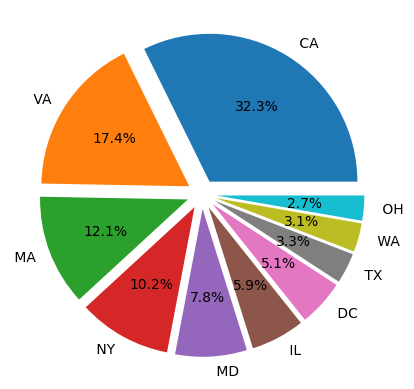

job_state
 CA    165
 VA     89
 MA     62
 NY     52
 MD     40
 IL     30
 DC     26
 TX     17
 WA     16
 OH     14
 MO     12
 PA     12
US      11
 CO     10
 NJ     10
 NC      9
 GA      9
 FL      8
 TN      8
 OK      6
 WI      6
 IN      5
 MI      5
 AZ      4
 AL      4
 MN      4
 CT      4
 UT      3
 NE      3
 IA      3
 OR      2
 SC      2
 RI      2
 NH      2
 LA      1
 MS      1
 KS      1
 DE      1
 WV      1
Name: count, dtype: int64

In [13]:
# 8.Pie chart for job_state

job_state_cleaned =cleaned_data.job_state.value_counts()
plt.pie(x=job_state_cleaned.values[:10], labels=job_state_cleaned.index[:10], explode=[0.1]*10,autopct='%1.1f%%' )
plt.show()
job_state_cleaned

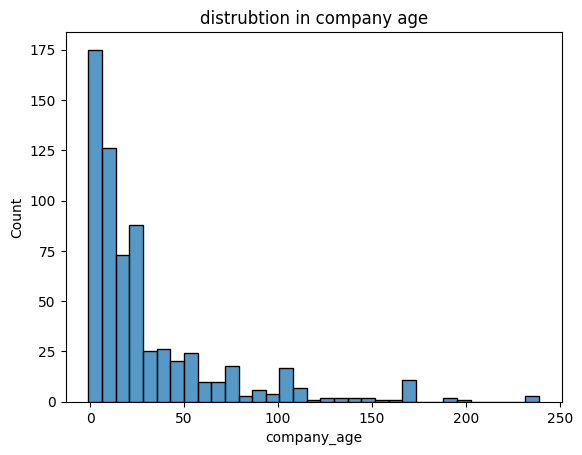

In [14]:
# 9- distrubtion in company_age 
cleaned_data.company_age 
sns.histplot(data=cleaned_data, x= 'company_age')
plt.title('distrubtion in company age')
plt.show()

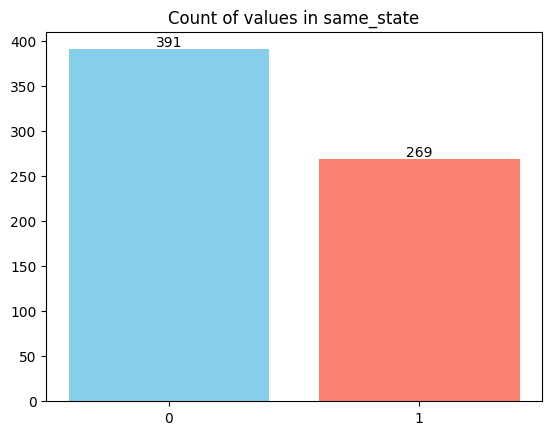

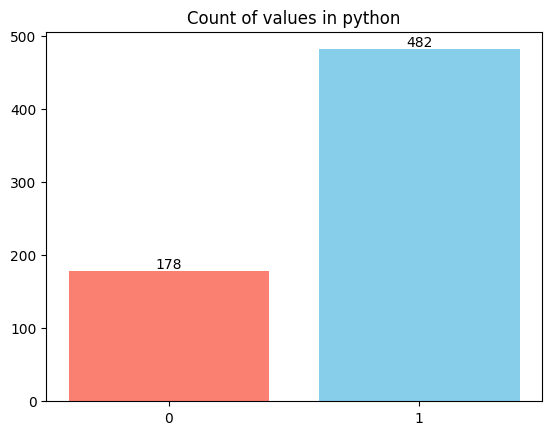

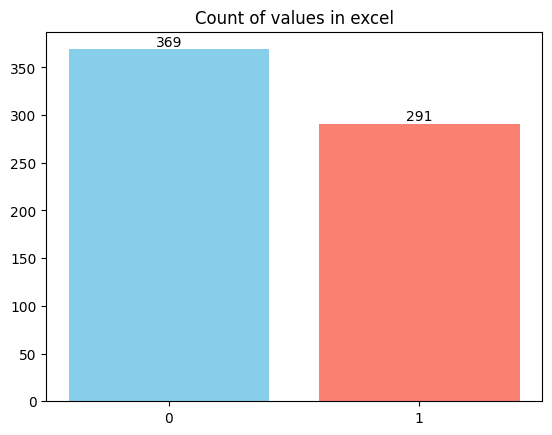

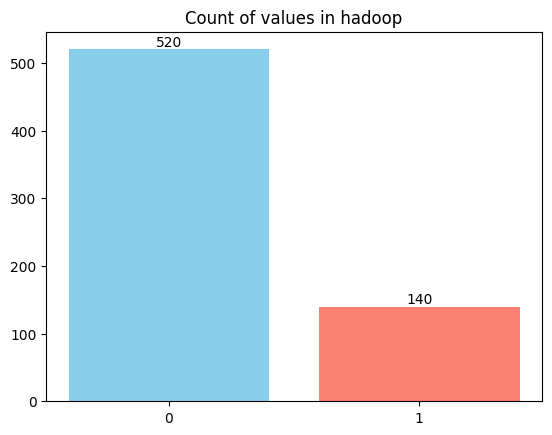

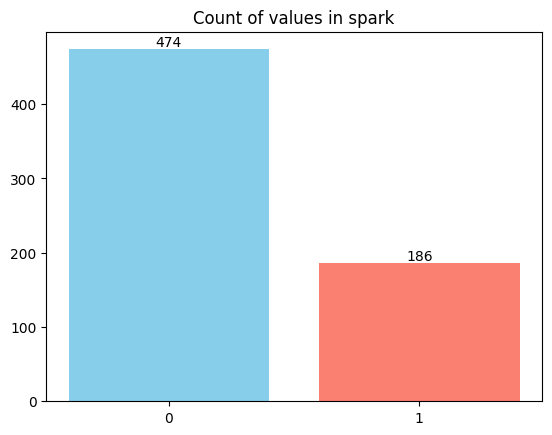

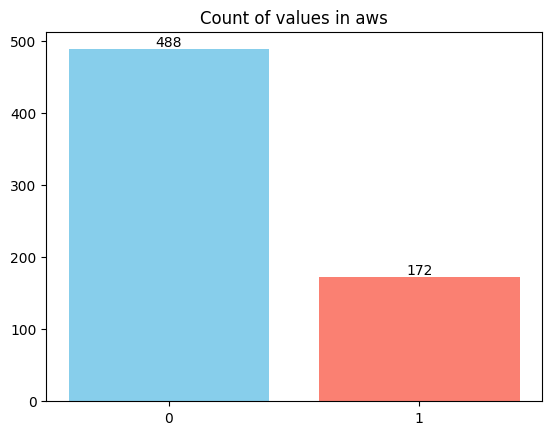

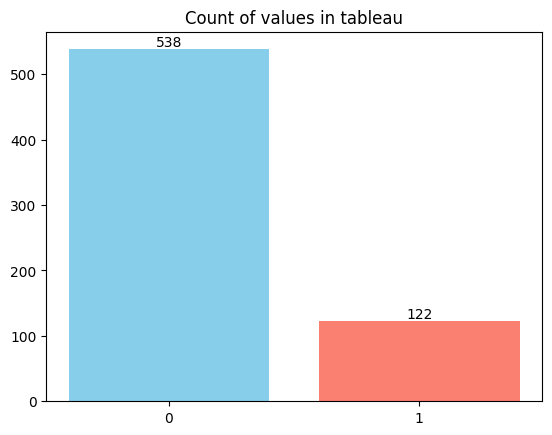

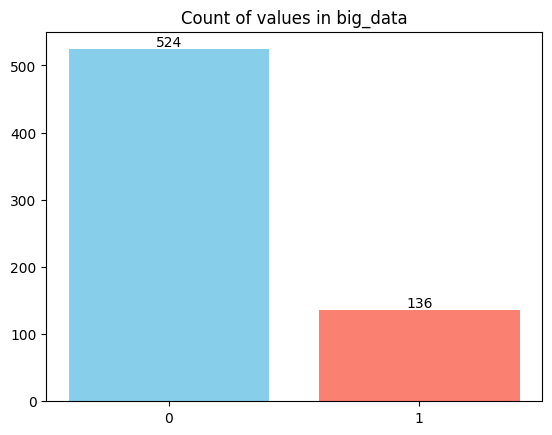

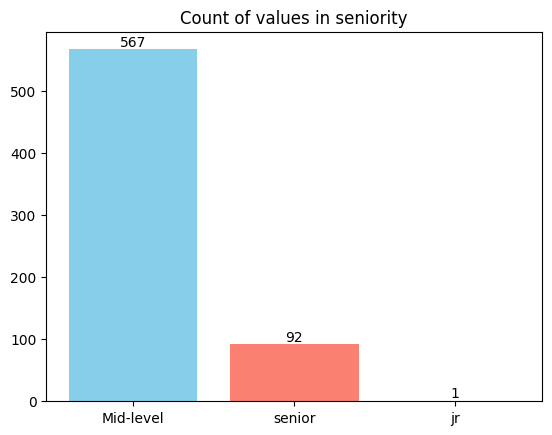

In [15]:
# 10- Boolean columns graphes 
bol_cols = ['same_state', 'python','excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data',
       'seniority']
color = ['skyblue', 'salmon']
for col in bol_cols:
    data=cleaned_data[col].value_counts()
    plt.bar(x= data.index, height=data.values,color =color )
    for index, value in enumerate(data.values):
        plt.text(data.index[index], value, str(value), ha='center', va='bottom')
    plt.title(f'Count of values in {col}')
    plt.xticks(data.index)
    plt.show()

In [16]:
#let's cleaning the Job Title
def clean_title(title):
    title = title.lower()
    Job_title_map = {
        'data scientist': 'data scientist',
        'data engineer':'data engineer',
        'machine learning': 'machine learning engineer',
        'analyst':'analyst'

    }
    for key, job in Job_title_map.items():
        if key in title:
            return job
    return 'other'
        
        
cleaned_data['sim_job_title'] = cleaned_data['Job Title'].apply(clean_title)

print(cleaned_data['sim_job_title'].value_counts())


sim_job_title
data scientist               447
other                         78
analyst                       55
data engineer                 46
machine learning engineer     34
Name: count, dtype: int64


# Relation between features
1. relation between salary and company age 
2. relation between salary and rating
3. relation between company age and rating
4. heatmap for correlation between salary, rating and company age 

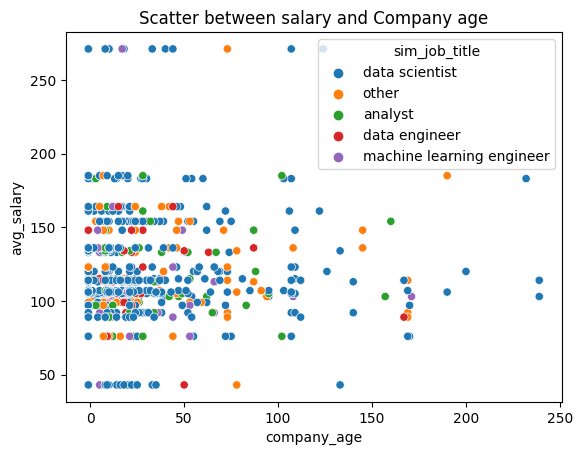

In [17]:
# 1- relation between salary and company age
sns.scatterplot(data= cleaned_data, x= 'company_age', y= 'avg_salary', hue='sim_job_title' )
plt.title('Scatter between salary and Company age')
plt.show()

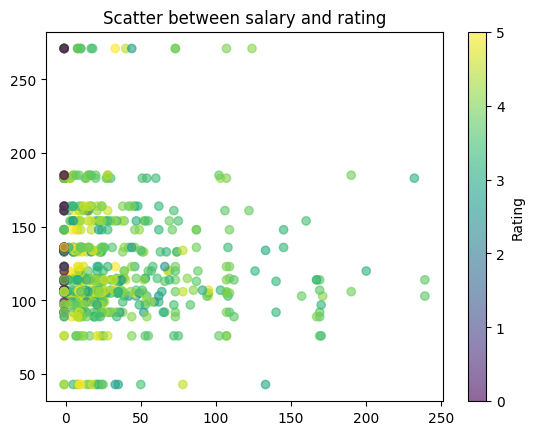

In [18]:
# 2- relation between salary and rating
plt.scatter( x=cleaned_data['company_age'], y= cleaned_data['avg_salary'], c=cleaned_data['Rating'], alpha = 0.6)
plt.colorbar(label='Rating')
plt.title('Scatter between salary and rating')
plt.show()

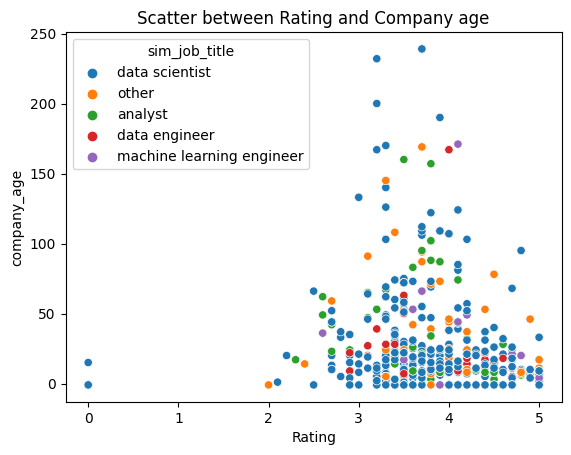

In [19]:
# 3- relation between company age and rating
sns.scatterplot(data= cleaned_data, x= 'Rating', y= 'company_age', hue='sim_job_title')
plt.title('Scatter between Rating and Company age')
plt.show()

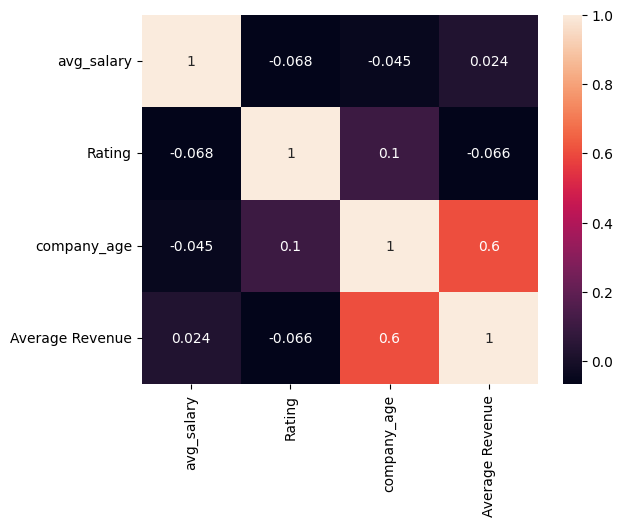

In [20]:
nu_data =cleaned_data[['avg_salary', 'Rating','company_age', 'Average Revenue']]
corr = nu_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

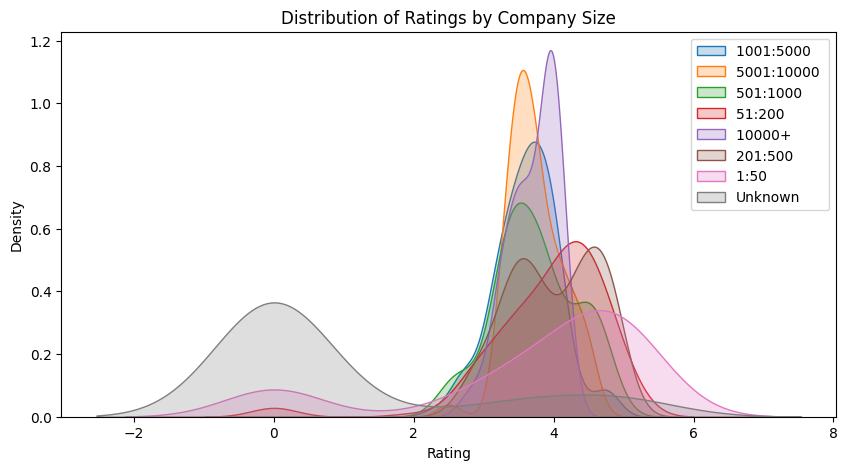

In [21]:
plt.figure(figsize=(10,5))
for size in cleaned_data.Size.unique():
    sns.kdeplot(data= cleaned_data[cleaned_data['Size']==size]['Rating'],label= size, shade=True)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Distribution of Ratings by Company Size')
plt.legend()
plt.show()

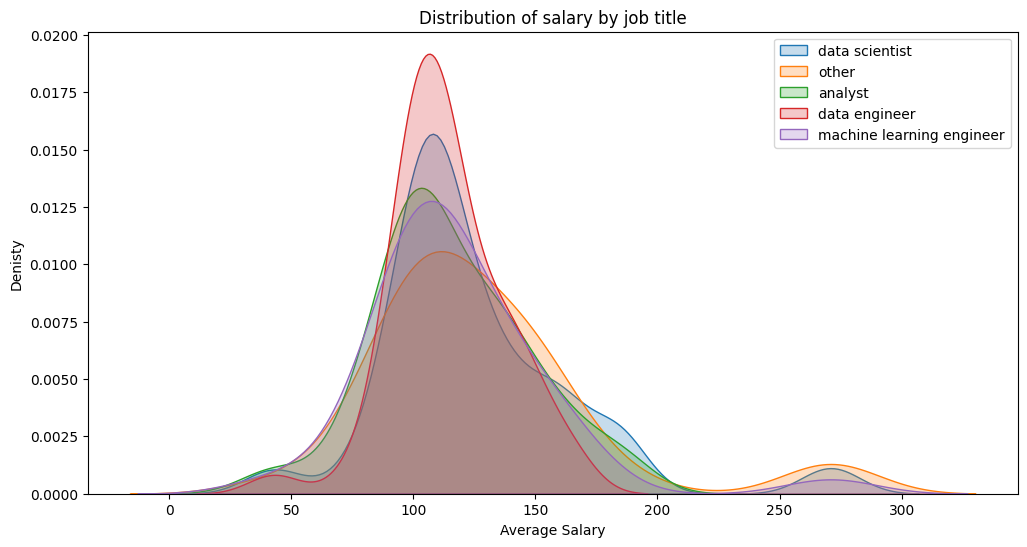

In [22]:
#Distribuation of salary by job title 
plt.figure(figsize=(12,6))
for title in cleaned_data.sim_job_title.unique():
    sns.kdeplot(data= cleaned_data[cleaned_data.sim_job_title == title]['avg_salary'], label= title, shade = True)
plt.legend()
plt.title('Distribution of salary by job title')
plt.ylabel('Denisty')
plt.xlabel('Average Salary')
plt.show()